<a href="https://colab.research.google.com/github/SAKETHRAHULKOREDLA/Random/blob/main/lenet_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import pandas

In [2]:
(x_train, y_train), (X_test,Y_test)=datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#x_train.shape
X_test.shape

(10000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

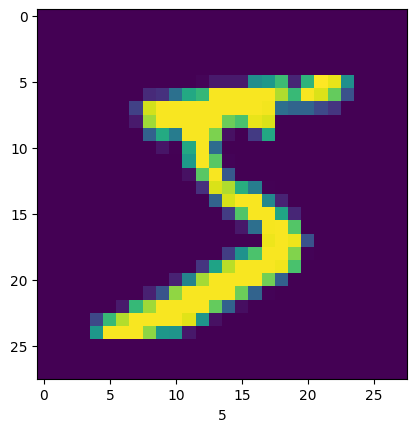

In [4]:
plt.imshow(x_train[0])
plt.xlabel(y_train[0])
plt.show

In [5]:
num_classes=10
input_shape=(28,28,1)

In [6]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes)
Y_test=tf.keras.utils.to_categorical(Y_test,10)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [12]:
model=models.Sequential([
    layers.Conv2D(5,(5,5),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2),strides=2),
    layers.Conv2D(16,(5,5),activation='relu'),
    layers.MaxPooling2D((2,2),strides=2),
    layers.Flatten(),
    layers.Dense(120,activation='relu'),
    layers.Dense(84,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
])

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 5)      │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 16)       │         2,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,000 (171.88 KB)

 Trainable params: 44,000 (171.88 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history=model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(X_test,Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.7424 - loss: 2.2014 - val_accuracy: 0.9480 - val_loss: 0.1746
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9593 - loss: 0.1340 - val_accuracy: 0.9667 - val_loss: 0.1087
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9766 - loss: 0.0744 - val_accuracy: 0.9768 - val_loss: 0.0736
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9828 - loss: 0.0499 - val_accuracy: 0.9797 - val_loss: 0.0685
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9865 - loss: 0.0421 - val_accuracy: 0.9769 - val_loss: 0.0797
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9887 - loss: 0.0326 - val_accuracy: 0.9809 - val_loss: 0.0688
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9911 - loss: 0.0270 - val_accuracy: 0.9792 - val_loss: 0.0780
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 

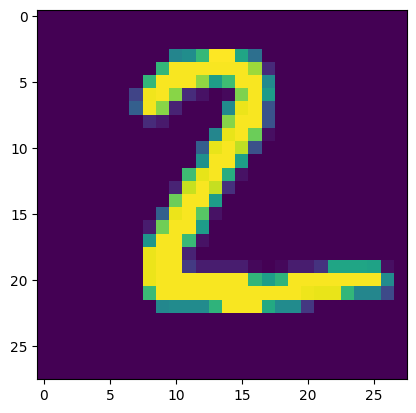

In [16]:
plt.imshow(X_test[1])

In [17]:
prediction=model.predict(X_test[1].reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


In [18]:
print(prediction.argmax())

2


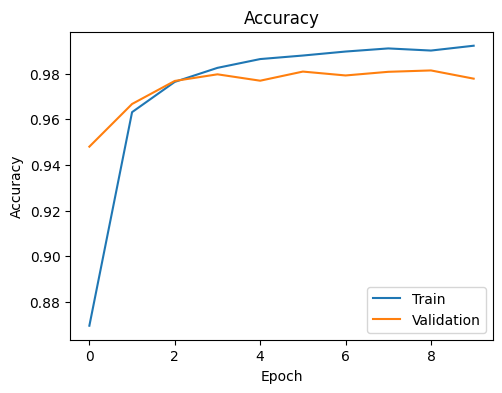

In [19]:
plt.figure(figsize=(12, 4))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()